
# ARIMA and Seasonal ARIMA


## Autoregressive Integrated Moving Averages

The general process for ARIMA models is the following:
* Visualize the Time Series Data
* Make the time series data stationary
* Plot the Correlation and AutoCorrelation Charts
* Construct the ARIMA Model or Seasonal ARIMA based on the data
* Using the model to make predictions



In [76]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [77]:
df=pd.read_csv('candy_production.csv')

In [78]:
df.head()

,observation_date,IPG3113N
0,1972-01-01,85.6945
1,1972-02-01,71.8200
2,1972-03-01,66.0229
3,1972-04-01,64.5645
4,1972-05-01,65.0100


In [79]:
df.tail()

,observation_date,IPG3113N
543,2017-04-01,107.4288
544,2017-05-01,101.9209
545,2017-06-01,104.2022
546,2017-07-01,102.5861
547,2017-08-01,114.0613


In [80]:
# Cleaning up the data
df.columns=["Month","Sales"]
df.head()

,Month,Sales
0,1972-01-01,85.6945
1,1972-02-01,71.8200
2,1972-03-01,66.0229
3,1972-04-01,64.5645
4,1972-05-01,65.0100


In [81]:
df.set_index('Month',inplace=True)

In [82]:
df.head()

,Sales
Month,
1972-01-01,85.6945
1972-02-01,71.8200
1972-03-01,66.0229
1972-04-01,64.5645
1972-05-01,65.0100


In [83]:
df.describe()

,Sales
count,548.000000
mean,100.662524
std,18.052931
min,50.668900
25%,87.862475
50%,102.278550
75%,114.691900
max,139.915300


## Step 2: Visualize the Data

<Axes: xlabel='Month'>

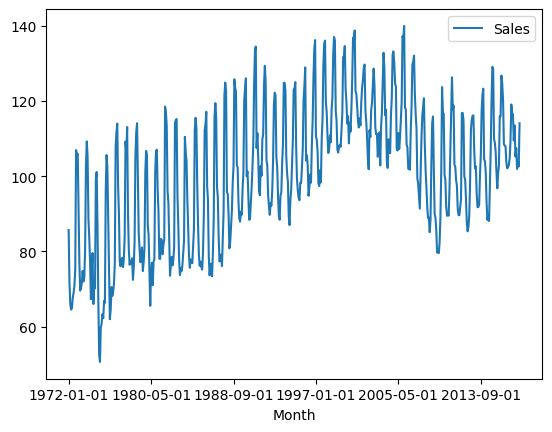

In [84]:
df.plot()

In [85]:
### Testing For Stationarity

from statsmodels.tsa.stattools import adfuller

In [86]:
test_result=adfuller(df['Sales'])

In [87]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [88]:
adfuller_test(df['Sales'])

ADF Test Statistic : -1.887049811225274
p-value : 0.3381775973004322
#Lags Used : 14
Number of Observations Used : 533
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


## Differencing

In [89]:
df['Sales First Difference'] = df['Sales'] - df['Sales'].shift(1)

In [90]:
df['Sales'].shift(1)

Month
1972-01-01         NaN
1972-02-01     85.6945
1972-03-01     71.8200
1972-04-01     66.0229
1972-05-01     64.5645
                ...   
2017-04-01    105.2245
2017-05-01    107.4288
2017-06-01    101.9209
2017-07-01    104.2022
2017-08-01    102.5861
Name: Sales, Length: 548, dtype: float64

In [91]:
df['Seasonal First Difference']=df['Sales']-df['Sales'].shift(12)

In [92]:
df.head(14)

,Sales,Sales First Difference,Seasonal First Difference
Month,,,
1972-01-01,85.6945,NaN,NaN
1972-02-01,71.8200,-13.8745,NaN
1972-03-01,66.0229,-5.7971,NaN
1972-04-01,64.5645,-1.4584,NaN
1972-05-01,65.0100,0.4455,NaN
1972-06-01,67.6467,2.6367,NaN
1972-07-01,69.0429,1.3962,NaN
1972-08-01,70.8370,1.7941,NaN
1972-09-01,75.0462,4.2092,NaN


In [93]:
## Again test dickey fuller test
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic : -4.989819790366835
p-value : 2.324609557691987e-05
#Lags Used : 19
Number of Observations Used : 516
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


<Axes: xlabel='Month'>

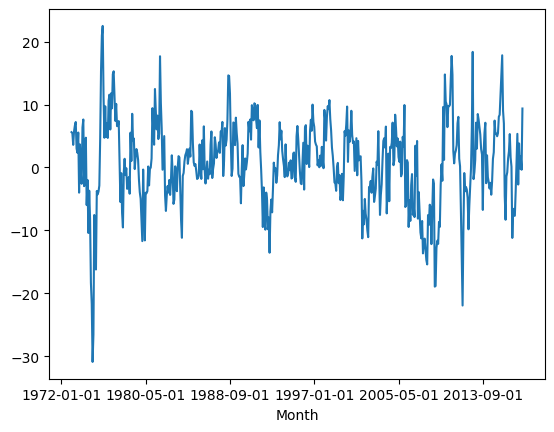

In [94]:
df['Seasonal First Difference'].plot()

## Auto Regressive Model
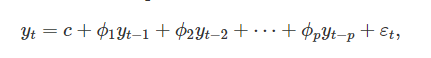

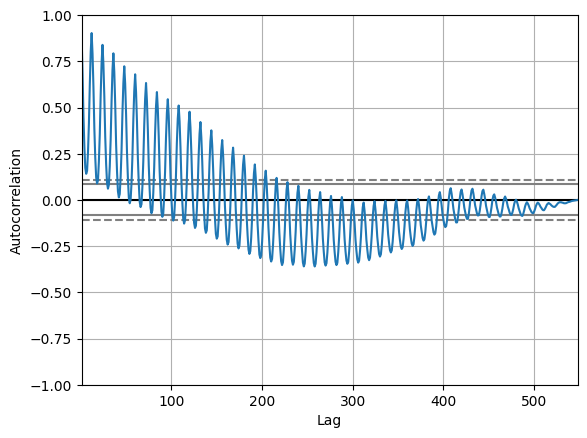

In [95]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Sales'])
plt.show()

### Final Thoughts on Autocorrelation and Partial Autocorrelation

* Identification of an AR model is often best done with the PACF.
    * For an AR model, the theoretical PACF “shuts off” past the order of the model.  The phrase “shuts off” means that in theory the partial autocorrelations are equal to 0 beyond that point.  Put another way, the number of non-zero partial autocorrelations gives the order of the AR model.  By the “order of the model” we mean the most extreme lag of x that is used as a predictor.
    
    
* Identification of an MA model is often best done with the ACF rather than the PACF.
    * For an MA model, the theoretical PACF does not shut off, but instead tapers toward 0 in some manner.  A clearer pattern for an MA model is in the ACF.  The ACF will have non-zero autocorrelations only at lags involved in the model.
    
    * p,d,q - we need to specify three values
    * p-AR model lags
    * d-differencing
    * q-MA lags

In [96]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm


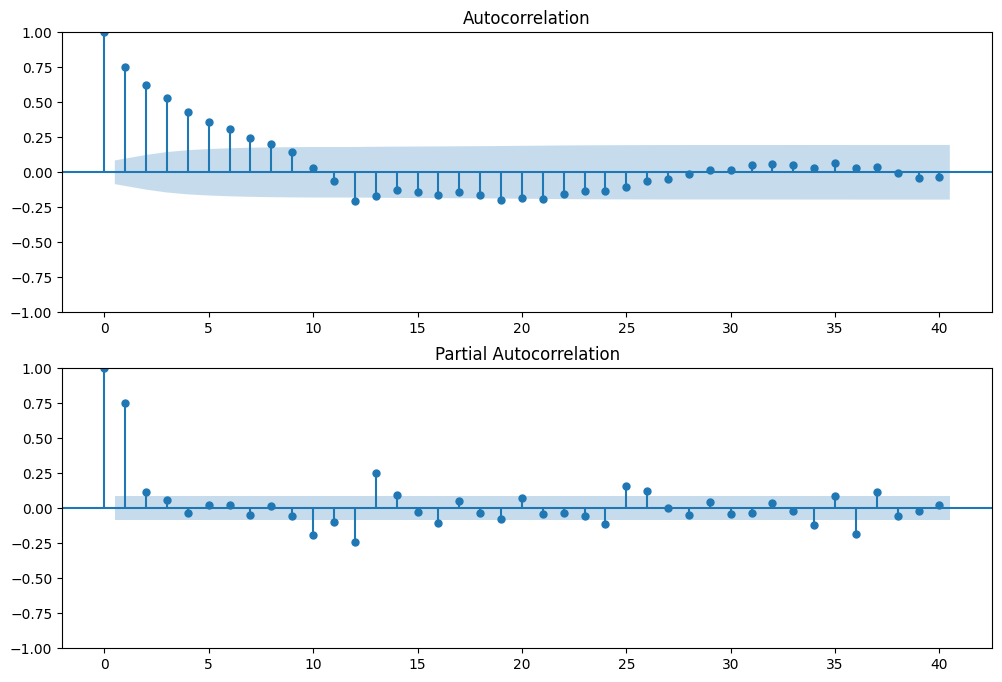

In [97]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax2)

In [98]:
# For non-seasonal data
#if the partial autocorrelation values drop below the upper confidence interval after lag 2, you might choose p=2 for your ARIMA model.
#p=2, d=1, q=8
#d - seasonal diffrence only one time we shifted
from statsmodels.tsa.arima.model import ARIMA

In [99]:
model=ARIMA(df['Sales'],order=(2,1,8))
model_fit=model.fit()

C:\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [100]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                  548
Model:                 ARIMA(2, 1, 8)   Log Likelihood               -1829.350
Date:                Sun, 19 Nov 2023   AIC                           3680.699
Time:                        02:34:56   BIC                           3728.048
Sample:                    01-01-1972   HQIC                          3699.207
                         - 08-01-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4666      0.097      4.812      0.000       0.277       0.657
ar.L2         -0.3292      0.093     -3.556      0.000      -0.511      -0.148
ma.L1         -0.4957      0.096     -5.154      0.000      -0.684      -0.307
ma.L2          0.3965      0.088      4.516      0.000       0.224       0.569
ma.L3         -0.5141      0.051     -9.991      0.000      -0.615      -0.413
ma.L4         -0.2806      0.065     -4.314      0.000      -0.408      -0.153
ma.L5         -0.2721      0.062     -4.370      0.000      -0.394      -0.150
ma.L6         -0.0672      0.053     -1.272      0.203      -0.171       0.036
ma.L7          0.0741      0.051      1.457      0.145      -0.026       0.174
ma.L8          0.3836      0.061      6.254      0.000       0.263       0.504
sigma2        46.6786      2.372     19.682      0.000      42.030      51.327
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):                53.12
Prob(Q):                              0.82   Prob(JB):                         0.00
Heteroskedasticity (H):               0.61   Skew:                             0.45
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.23
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Axes: xlabel='Month'>

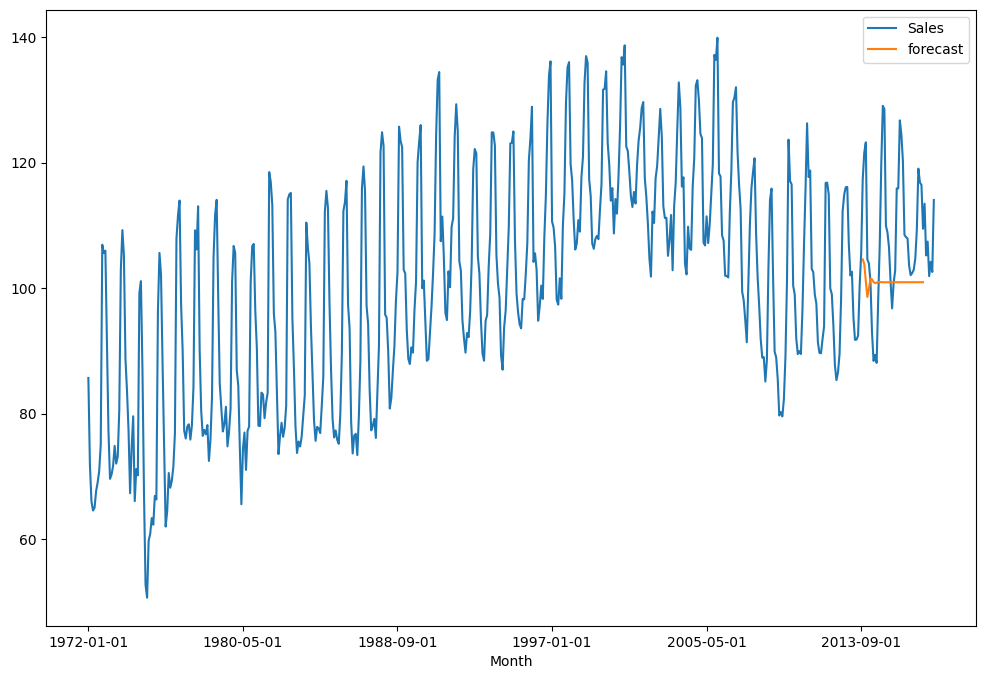

In [101]:
df['forecast']=model_fit.predict(start=501,end=540,dynamic=True)
df[['Sales','forecast']].plot(figsize=(12,8))

In [102]:
import statsmodels.api as sm

In [103]:
model=sm.tsa.statespace.SARIMAX(df['Sales'],order=(2, 1, 6),seasonal_order=(2,1,6,12))
results=model.fit()

C:\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<Axes: xlabel='Month'>

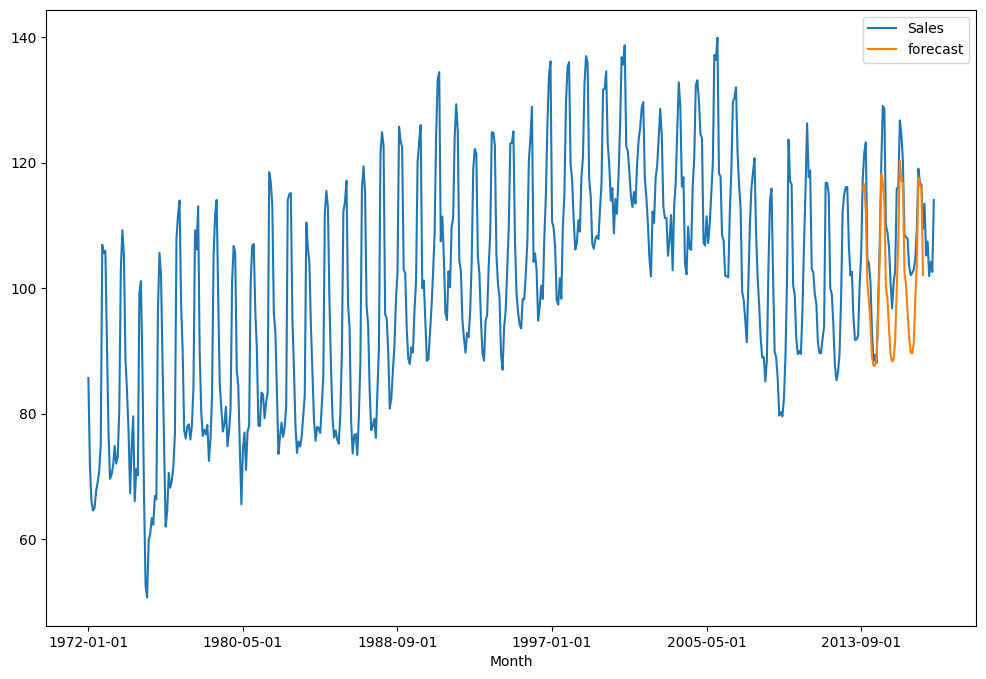

In [104]:
df['forecast']=results.predict(start=501,end=540,dynamic=True)
df[['Sales','forecast']].plot(figsize=(12,8))

In [127]:
from pandas.tseries.offsets import DateOffset

# Assuming df is your DataFrame with a datetime index stored as strings
df.index = pd.to_datetime(df.index)

# Generate future dates
future_dates = [df.index[-1] + DateOffset(months=x) for x in range(1, 100)]

# Convert the list of future dates to a DatetimeIndex
future_index = pd.to_datetime(future_dates)

# Now, 'future_index' is a DatetimeIndex containing the future dates


In [128]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [129]:
future_datest_df.tail()

,Sales,Sales First Difference,Seasonal First Difference,forecast
2025-07-01,NaN,NaN,NaN,NaN
2025-08-01,NaN,NaN,NaN,NaN
2025-09-01,NaN,NaN,NaN,NaN
2025-10-01,NaN,NaN,NaN,NaN
2025-11-01,NaN,NaN,NaN,NaN


In [130]:
future_df=pd.concat([df,future_datest_df])

C:\Users\Harsh\AppData\Local\Temp\ipykernel_22148\1723908026.py:1: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  future_df=pd.concat([df,future_datest_df])


<Axes: >

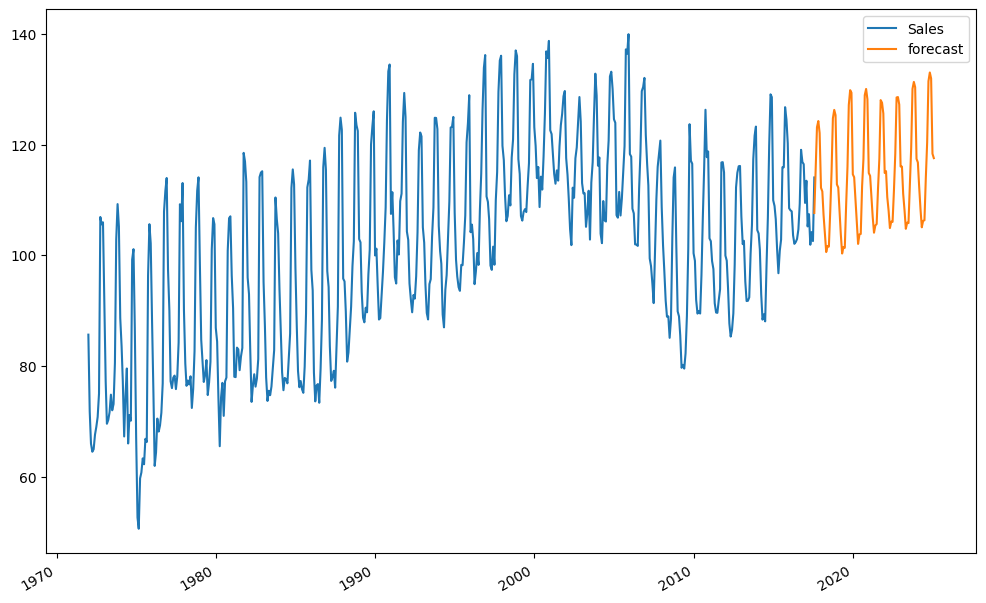

In [131]:
future_df['forecast'] = results.predict(start = 547, end = 637, dynamic= True)  
future_df[['Sales', 'forecast']].plot(figsize=(12, 8)) 